In [1]:
import networkx as nx 
import numpy as np

import severability

# Multiscale severability applied to 2D grid graph

Graph with 100 nodes and 180 edges


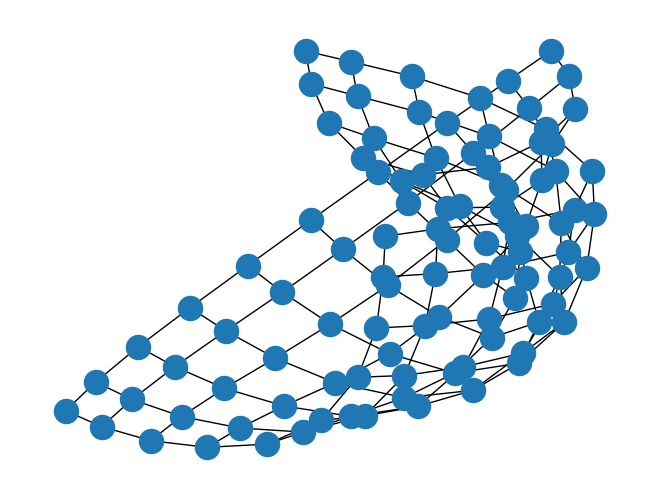

In [2]:
# get 2D grid graph
G = nx.grid_2d_graph(10,10)
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix
A = nx.to_numpy_array(G)

In [4]:
# run multiscale severability
sev_results = severability.multiscale_severability(A, t_max=20, n_tries=20, n_workers=5, max_size=60)

Optimise severability ...


100%|██████████| 10/10 [01:25<00:00,  8.50s/it]


Compute 1-Rand(t) ...


100%|██████████| 10/10 [05:29<00:00, 32.93s/it]


Compute 1-Rand(t,t') ...


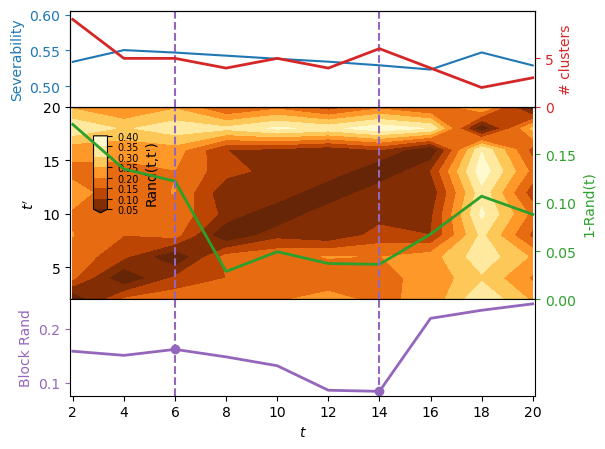

In [5]:
# plot severability results
sev_results = severability.identify_optimal_scales(sev_results, kernel_size=4)
severability.plot_scan(sev_results)

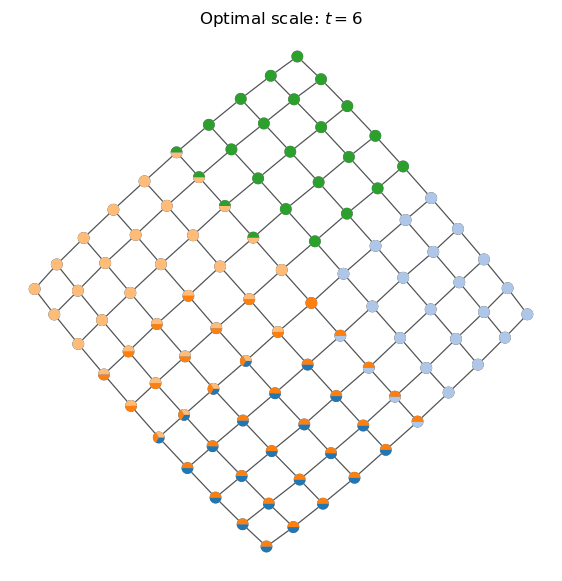

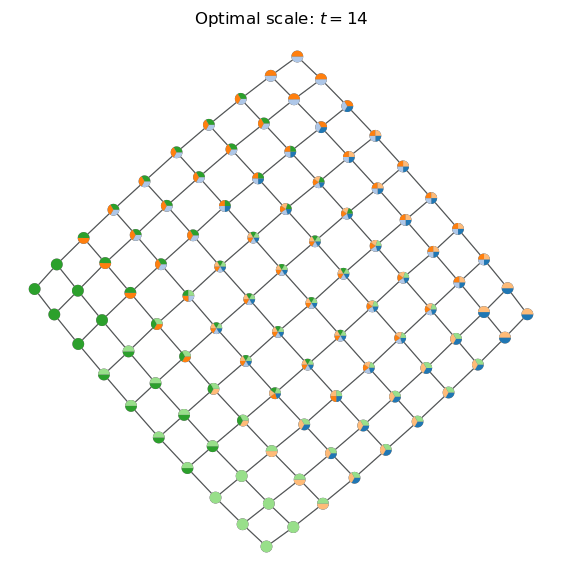

In [6]:
# create the pie chart graph visualisation
for i in sev_results["selected_partitions"]:
    severability.plot_pie_graph(sev_results['partitions'][i], A, title=f"Optimal scale: $t={sev_results['scales'][i]}$")
